# Analysis of conditions contirbuting to COVID-19 deaths from 2020-2022


### Dataset Name:
Conditions Contributing to COVID-19 Deaths, by State and Age, Provisional 2020-2022

### Description: 
shows the number of COVID-19 death cases due to different health coniditions and contirbuting causes. The data is also catagorized by age and state. 

*URL: https://data.cdc.gov/NCHS/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/hk9y-quqm
It can be downloaded as CSV or Excel by the "Export" button besides title

### Questions:
1.What are the top 10 conditions contirbuting to COVID-19 death among people of all ages in United States? 

2.Across different age groups in Massachusetts, how many death cases are caused by the top 5 conditions?

### Jupyter data analysis 
load dataset into Jupyter, analyze using list and set comprehension

In [14]:
import csv
with open ('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv', 'r',encoding = 'utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader]
    csvfile.close()

#list comprehension
r = {row["Condition"] for row in data if row["Age Group"]=="0-24"}
r

{'Adult respiratory distress syndrome',
 'All other conditions and causes (residual)',
 'Alzheimer disease',
 'COVID-19',
 'Cardiac arrest',
 'Cardiac arrhythmia',
 'Cerebrovascular diseases',
 'Chronic lower respiratory diseases',
 'Diabetes',
 'Heart failure',
 'Hypertensive diseases',
 'Influenza and pneumonia',
 'Intentional and unintentional injury, poisoning, and other adverse events',
 'Ischemic heart disease',
 'Malignant neoplasms',
 'Obesity',
 'Other diseases of the circulatory system',
 'Other diseases of the respiratory system',
 'Renal failure',
 'Respiratory arrest',
 'Respiratory failure',
 'Sepsis',
 'Vascular and unspecified dementia'}

### Read data into data frame

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv')
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1249.0,1306.0,NaN
1,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5264.0,5461.0,NaN
2,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,13883.0,14429.0,NaN
3,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,34592.0,35885.0,NaN
4,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,75304.0,77892.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385015,03/06/2022,11/01/2021,11/30/2021,By Month,2021.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,28.0,28.0,NaN
385016,03/06/2022,12/01/2021,12/31/2021,By Month,2021.0,12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,51.0,51.0,NaN
385017,03/06/2022,01/01/2022,01/31/2022,By Month,2022.0,1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,0.0,0.0,NaN
385018,03/06/2022,02/01/2022,02/28/2022,By Month,2022.0,2.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,0.0,0.0,NaN


### Read columns

In [32]:
df.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')

### Read index

In [33]:
df.index

RangeIndex(start=0, stop=385020, step=1)

### Rough overview

In [67]:
df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,372600.000000,335340.000000,279812.000000,282992.000000
mean,2020.700000,6.000000,154.012262,164.396269
std,0.690411,3.559031,3207.972758,3413.918320
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,0.000000,0.000000
75%,2021.000000,9.000000,25.000000,27.000000
max,2022.000000,12.000000,951757.000000,951757.000000


### Take a subset of data
Only examines data from 1/1/2020 to 3/5/2022 from each states

In [98]:
subset = df.loc[(df["Start Date"]=="01/01/2020") & (df["End Date"]=="03/05/2022") & (df["State"]!="United States")]
#subset 1: data of all ages 
subset1 = subset.loc[subset["Age Group"]=="All Ages"]
subset1

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
239,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,6153.0,6272.0,NaN
249,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,1316.0,1360.0,NaN
259,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,1076.0,1076.0,NaN
269,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Respiratory failure,J96,All Ages,7448.0,7572.0,NaN
279,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Respiratory arrest,R09.2,All Ages,1623.0,1623.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,Vascular and unspecified dementia,Vascular and unspecified dementia,"F01, F03",All Ages,57.0,57.0,NaN
12389,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,Renal failure,Renal failure,N17-N19,All Ages,489.0,495.0,NaN
12399,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",All Ages,116.0,215.0,NaN
12409,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,All other conditions and causes (residual),All other conditions and causes (residual),"A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F...",All Ages,1370.0,1929.0,NaN


## Q1. What are the top 10 conditions contirbuting to COVID-19 death among people of all ages in United States?

### Groupby
Shows the total number of death cases for each condition across all states from 1/1/2020-3/5/2022

In [100]:
s = subset1.groupby('Condition')['COVID-19 Deaths'].agg(sum)
s

Condition
Adult respiratory distress syndrome                                           99091.0
All other conditions and causes (residual)                                   382517.0
Alzheimer disease                                                             27296.0
COVID-19                                                                     955021.0
Cardiac arrest                                                               113279.0
Cardiac arrhythmia                                                            71055.0
Cerebrovascular diseases                                                      45249.0
Chronic lower respiratory diseases                                            82991.0
Diabetes                                                                     143226.0
Heart failure                                                                 71043.0
Hypertensive diseases                                                        173656.0
Influenza and pneumonia                     

### The top 10 conditions contirbuting to COVID-19 death among all ages groups in U.S

In [111]:
s.sort_values(ascending = False).head(10)

Condition
COVID-19                                      955021.0
Influenza and pneumonia                       467784.0
All other conditions and causes (residual)    382517.0
Respiratory failure                           374651.0
Hypertensive diseases                         173656.0
Diabetes                                      143226.0
Cardiac arrest                                113279.0
Renal failure                                 102894.0
Ischemic heart disease                         99305.0
Adult respiratory distress syndrome            99091.0
Name: COVID-19 Deaths, dtype: float64

## Q2. Across different age groups in Massachusetts, how many death cases are caused by the top 5 conditions?

In [99]:
# subset2: data of different age groups
subset2 = subset.loc[subset["Age Group"]!="All Ages"]
subset2

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
230,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,15.0,15.0,NaN
231,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,95.0,100.0,NaN
232,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,218.0,224.0,NaN
233,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,505.0,520.0,NaN
234,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,1082.0,1114.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12414,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,55-64,529.0,529.0,NaN
12415,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,65-74,782.0,782.0,NaN
12416,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,75-84,804.0,804.0,NaN
12417,03/06/2022,01/01/2020,03/05/2022,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,85+,599.0,599.0,NaN


### Pivot table
row = Age group, column = Condition, value = number of death cases

shows the number of deaths cuased by the top 5 conditions among people with different ages in Massachusetts

In [136]:
column = "COVID-19 Deaths"
topConditions = ('COVID-19','Influenza and pneumonia','All other conditions and causes (residual)','Respiratory failure','Hypertensive diseases')
subset2 = subset.loc[(subset["Condition"].isin(topConditions)) & (subset["State"]=="Massachusetts") & (subset["Age Group"]!="All Ages")]

pivoted2 = subset2.pivot_table(values = column, index = ["Age Group"], columns = ["Condition"])
pivoted2

Condition,All other conditions and causes (residual),COVID-19,Hypertensive diseases,Influenza and pneumonia,Respiratory failure
Age Group,,,,,
0-24,22.0,32.0,0.0,11.0,11.0
25-34,51.0,98.0,NaN,38.0,32.0
35-44,98.0,182.0,NaN,73.0,67.0
45-54,275.0,573.0,46.0,246.0,241.0
55-64,841.0,1665.0,150.0,788.0,726.0
65-74,1551.0,3204.0,280.0,1429.0,1455.0
75-84,2031.0,4758.0,442.0,1987.0,2091.0
85+,2605.0,7227.0,736.0,2489.0,2466.0
Not stated,0.0,0.0,0.0,0.0,0.0


### plot

Text(0.5, 1.0, 'Number of COVID-19 deaths caused by top 5 conditions across different age groups in Massachusetts')

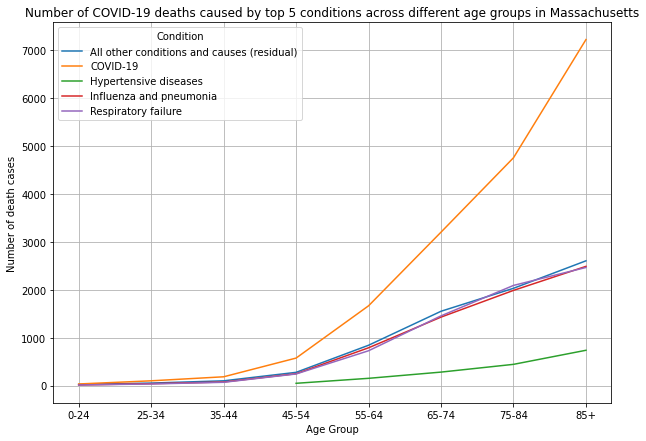

In [148]:
pivoted2[:-1].plot(figsize=(10,7))
plt.grid()
plt.ylabel('Number of death cases')
plt.title('Number of COVID-19 deaths caused by top 5 conditions across different age groups in Massachusetts')

## Pandas.analysis
### Q1: What are the top 10 conditions contirbuting to COVID-19 death among the entire population (all ages) of United States? 

Through groupby, we learned that the top 10 conditions that caused COVID-19 death are: 

COVID-19                                     
Influenza and pneumonia                      
All other conditions and causes (residual)
Respiratory failure                         
Hypertensive diseases                    
Diabetes                                     
Cardiac arrest                                
Renal failure                                
Ischemic heart disease                         
Adult respiratory distress syndrome           


The first three conditions don't reveal much new information as "covid-19, and other conidtions" are rather vague terms. But going down the list, it shows that implications of other underlying diseases such as different types of heart diseases can also cause a covid-19 patient to die. 

### Q2: Across different age groups in Massachusetts, how many death cases are caused by the top 5 conditions?
Here we focusesd on the data of Massachusetts. Based on the pivoted table, we plotted a graph of age group vs. number of death casued by the top 5 condiitons. 

It shows that the death number increases as the age increases, regardless of the condition. With an age greater than 45-54, the number of death increases drastically. This reinforces that elder people are at a greater risk of dying from covid-19. 